__Задание:__

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

*Решение:*

*В данном случае мы имеем дело с биномиальным распределением Bin(n,p), где n - это количество работников, а p - вероятность того, что работник ресторана испытывает на работе существенный стресс.  
Для того чтобы понять отличается ли уровень стресса работников в конкретной ресторанной сети от данных опроса, проверим нулевую гипотезу с помощью биномиального теста с двустронней альтернативой.  
H0: Уровень стресса работников в конкретной ресторанной сети соотвествует данным опроса (не отличается от среднего).*

In [2]:
from scipy import stats
p=stats.binom_test(67, 100, 0.75, alternative = "two-sided")
print "Достигаемый уровень значимости: %.4f" %p

Достигаемый уровень значимости: 0.0822


*С учетом полученного результата, на уровне значимости 0.05 мы не можем отвергнуть нулевую гипотезу. Следовательно у нас нет достаточных оснований отрицать, что уровень стресса работников рассматриваемой ресторанной сети не отличается от среднего.*

__Задание:__

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

*Решение:*

*Откроем файл на чтение, преобразовав в таблицу, и посмотрим первые 5 строк.*

In [6]:
import pandas as pd
data=pd.read_csv("pines.txt", delimiter = "\t")
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


*Далее поделим участок на квадраты размерами 40 на 40 и посчитаем количество сосен в каждом.*

In [8]:
result = stats.binned_statistic_2d(data['sn'], data['we'], None, 'count', bins=5)
print result.statistic

[[18. 26. 29. 25. 20.]
 [14. 12. 22. 34. 25.]
 [12. 24. 15. 50. 37.]
 [ 8. 19. 31. 50.  7.]
 [ 7.  8. 37. 27. 27.]]


*Получилось 25 квадратов и количество деревьев сильно варьируется.*
*Преобразуем полученные данные в список.*

In [9]:
observed=[]
for i in range(len(result.statistic)):
    for j in range(len(result.statistic[i])):
        observed.append(result.statistic[i][j])
print observed    

[18.0, 26.0, 29.0, 25.0, 20.0, 14.0, 12.0, 22.0, 34.0, 25.0, 12.0, 24.0, 15.0, 50.0, 37.0, 8.0, 19.0, 31.0, 50.0, 7.0, 7.0, 8.0, 37.0, 27.0, 27.0]


*Отобразим распределение сосен по квадратам при помощи гистограммы.*

Populating the interactive namespace from numpy and matplotlib


<BarContainer object of 25 artists>

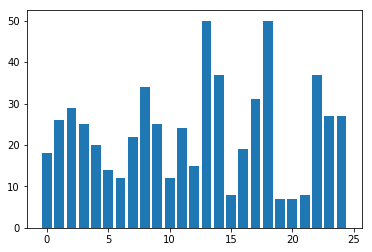

In [18]:
%pylab inline
pylab.bar(range(25), observed)

*Посчитаем среднее ожидаемое количество сосен в каждом квадрате при условии, что сосны распределены равномерно. И составим список квадратов со средним ожидаемым количеством сосен.*

In [14]:
exp_num = float(len(data))/len(observed)
print exp_num

23.36


In [15]:
import numpy as np
expected=np.full(25,exp_num).tolist()
print expected

[23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36]


*Для проверки соответствует ли наблюдаемое распределение сосен равномерному, воспользуемся критерием согласия Пирсона. (H0: рассматриваемая величина имеет равномерное распределение.)*

In [16]:
stats.chisquare(observed, expected, ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

*Значение p-value мало и мы можем отвергнуть нулевую гипотезу и следовательно сосны распределены в заповеднике неравномерно.*

*Посмотрим какие получились границы квадратов при применении stats.binned_statistic_2d и отобразим их и деревья на графике.*

In [64]:
print(result.x_edge)
print(result.y_edge)

[  0.  40.  80. 120. 160. 200.]
[  0.  40.  80. 120. 160. 200.]


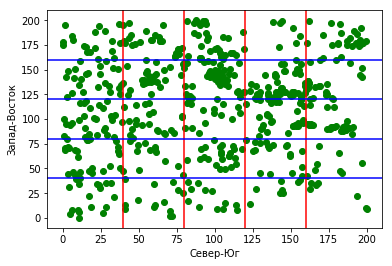

In [66]:
import matplotlib.pyplot as plt
plt.scatter(data['sn'], data['we'], c='green')
plt.xlabel(u'Север-Юг')
plt.ylabel(u'Запад-Восток')

plt.axvline(40, color='r')
plt.axvline(80, color='r')
plt.axvline(120, color='r')
plt.axvline(160, color='r')
plt.axhline(40, color='b')
plt.axhline(80, color='b')
plt.axhline(120, color='b')
plt.axhline(160, color='b')

plt.show()